In [1]:
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt #导入
import seaborn as sns

In [2]:
#导入数据
data = pd.read_excel('调研问卷2.xlsx',encoding = 'gbk')

In [3]:
data.head()

,room,category,new category,on&off,control,temperature setting,intensity during the day,use time during the day,intensity during the night,use time during the night
0,14_ 102,3,3,1,1,3,2,4,4,3
1,14_ 201,3,3,1,3,2,1,1,0,0
2,14_ 210,4,4,1,1,3,2,3,4,3
3,14_ 212,1,1,1,2,3,2,4,0,0
4,14_ 215,3,3,1,1,2,1,4,4,2


# 相关性分析

Text(0.5,1,'参数相关性分析')

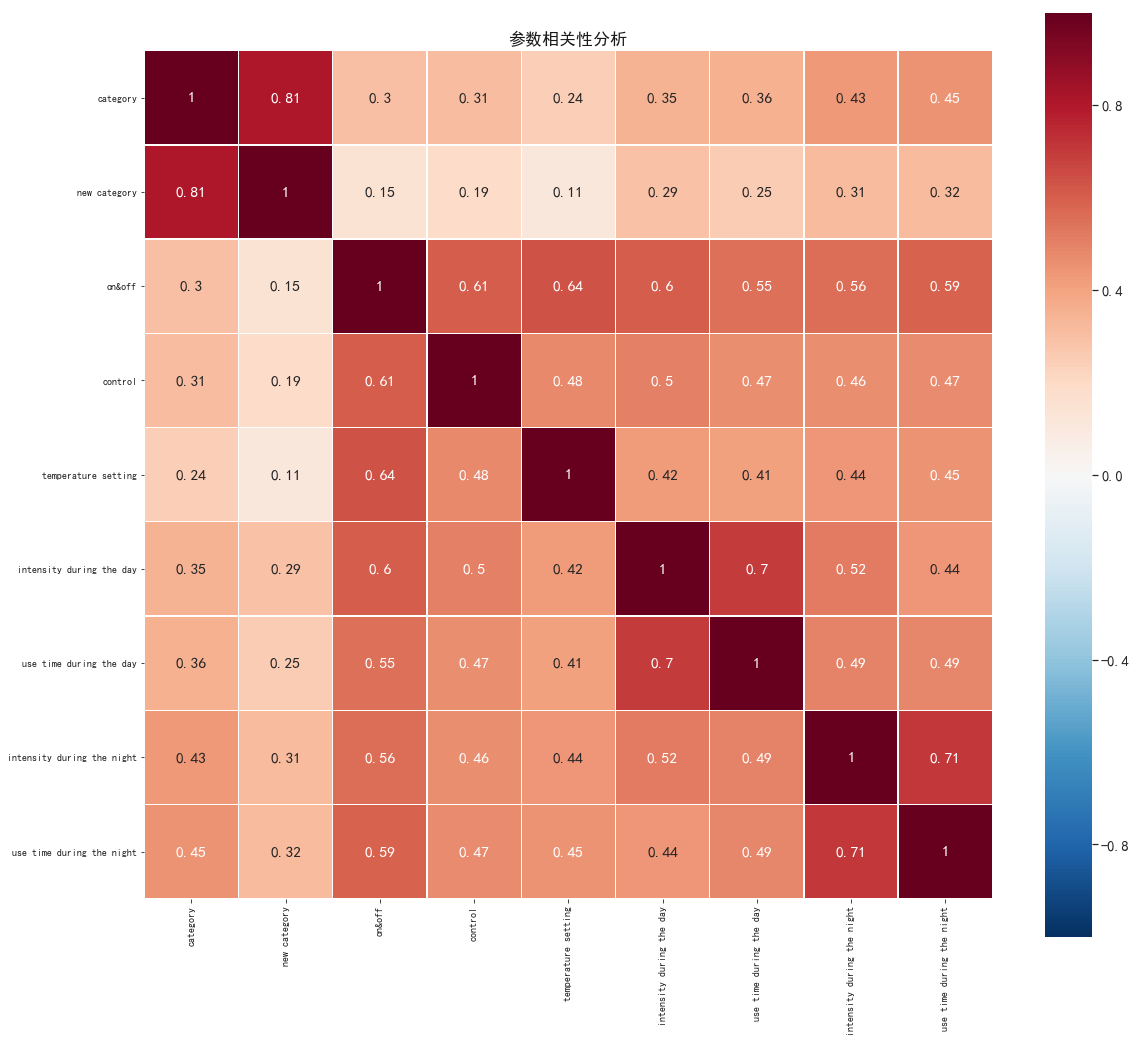

In [4]:
%matplotlib inline
hitmapTemp = data[['category','new category','on&off','control','temperature setting','intensity during the day','use time during the day','intensity during the night','use time during the night']]
hitmapTemp = (hitmapTemp-hitmapTemp.min())/(hitmapTemp.max()-hitmapTemp.min())#即简单实现标准化
hitmapData = hitmapTemp.corr(method='spearman',min_periods=1)
f, ax = plt.subplots(figsize=(19, 17))
sns.set( font_scale=1.3,palette="muted", color_codes=True)
from matplotlib.font_manager import FontProperties #字体管理器
#设置汉字格式
from matplotlib import font_manager
font = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=10)
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
my_font = font_manager.FontProperties(fname='msyh.ttc')
sns.heatmap(hitmapData, vmax=1,vmin=-1, square=True,annot=True, xticklabels=True,yticklabels=True,linewidths=0.3,cmap="RdBu_r")
plt.title('参数相关性分析',fontdict={'weight':'normal','size': 17})
# plt.savefig('./相关性热力图.pdf',format='pdf')
# plt.savefig('./相关性2热力图.png',format='png')

# 随机森林进行训练确定分组

In [5]:
#数据分组
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)
train_set.to_excel('问卷训练集.xlsx',encoding='gbk')
test_set.to_excel('问卷测试集.xlsx',encoding='gbk')

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import time

In [7]:
# 1.读取数据
train = pd.read_excel('问卷训练集.xlsx',encoding = 'gbk')
validate = pd.read_excel('问卷测试集.xlsx',encoding = 'gbk')

In [8]:
train.head()

,room,category,new category,on&off,control,temperature setting,intensity during the day,use time during the day,intensity during the night,use time during the night
115,14_ 715,3,4,1,3,3,1,2,1,1
205,15_ 604,1,1,1,2,2,1,1,1,1
216,15_ 625,4,4,1,1,2,2,4,3,1
132,15_ 222,1,1,1,2,2,2,3,4,2
84,14_ 612,2,2,1,2,2,1,2,4,2


In [9]:
X_train = train.drop(['room','new category','category','on&off','intensity during the day'], axis = 1)
X_test = validate.drop(['room','new category','category','on&off','intensity during the day'], axis = 1)
Y_train = train['new category']
Y_test = validate['new category']

In [10]:
X_train.head()

,control,temperature setting,use time during the day,intensity during the night,use time during the night
115,3,3,2,1,1
205,2,2,1,1,1
216,1,2,4,3,1
132,2,2,3,4,2
84,2,2,2,4,2


[-0.0128179   0.17549547 -0.73145572 -0.26294199 -0.19635557 -1.49091586
 -0.96281214 -0.54115178 -0.09093141 -1.18128276]
[-0.0696147   0.15450165 -0.74703288 -0.22930197 -0.16909492 -1.45234517
 -0.87107137 -0.54141143 -0.15924441 -1.07152579]
[-0.12947853  0.18067809 -0.72299408 -0.23590804 -0.15357    -1.3856795
 -0.76645887 -0.51226402 -0.09949458 -1.09147332]
[-0.10219812  0.20287105 -0.71799283 -0.24447743 -0.09126833 -1.37550039
 -0.80649578 -0.46461055 -0.11078018 -1.11939804]
[-0.10744277  0.21852169 -0.63565419 -0.25269941 -0.08705985 -1.31110829
 -0.81628412 -0.48918739 -0.15685581 -1.10717954]
[-0.10351949  0.23075383 -0.65190974 -0.25355112 -0.09031669 -1.3326102
 -0.85371348 -0.43943054 -0.1873469  -1.10867414]
[-0.09031867  0.23757979 -0.6663464  -0.25015506 -0.0993047  -1.30985051
 -0.8228901  -0.47394415 -0.197076   -1.09549031]
[-0.10249553  0.23218208 -0.70113019 -0.24646574 -0.07036796 -1.23271268
 -0.84691868 -0.5313153  -0.16653742 -1.0863262 ]
[-0.09043371  0.21

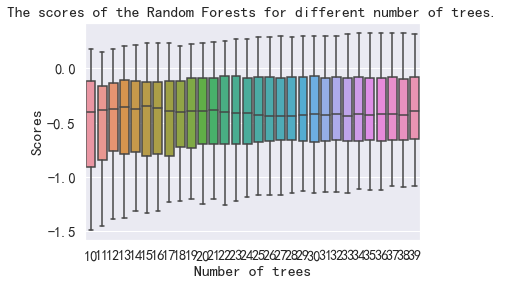

In [11]:
# 2.Find the optimal number of trees.
from sklearn.model_selection import cross_val_score
scores = pd.DataFrame()
t0 = time.time()
for n in range(10,40):
    RF = RandomForestRegressor(n_estimators=n, max_depth=None, min_samples_split=2, random_state=0)
    score = cross_val_score(RF, X_train, Y_train,cv=10)
    scores[n] = score
    print(score)
#sns.set_context("talk")
#sns.set_style("white")
sns.boxplot(data=scores)
plt.xlabel("Number of trees")
plt.ylabel("Scores")
plt.title("The scores of the Random Forests for different number of trees.")
#plt.xlim(0,41)
plt.show()

In [12]:
# 3.使用随机森林训练预测
RF_e = RandomForestRegressor(n_estimators=40, max_depth=None, random_state=0)
t0 = time.time()
RF_e.fit(X_train, Y_train)
print('训练时间：', time.time() - t0)
Y_pred=RF_e.predict(X_test)

训练时间： 0.02795243263244629


[0.20330725 0.15064478 0.25599099 0.21471415 0.17534282]


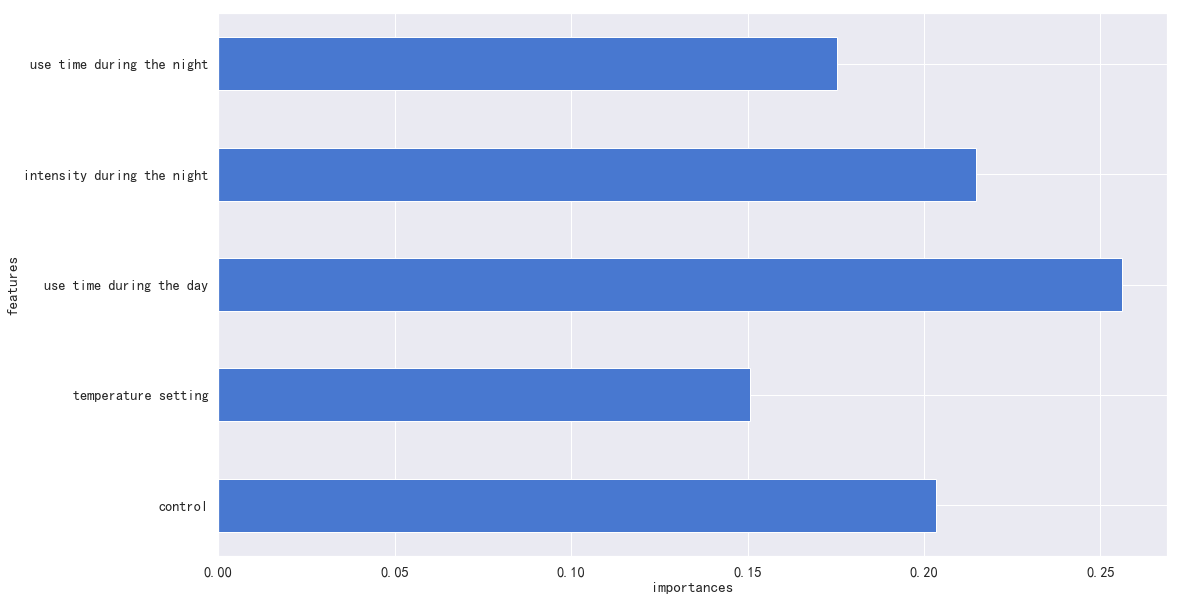

In [13]:
#4计算Feature importances
importances = RF_e.feature_importances_
print(importances)
f_values = importances
f_index =  [ 'control','temperature setting', 'use time during the day','intensity during the night', 'use time during the night']
x_index = list(range(0,5))
x_index = [x/0.6 for x in x_index]
plt.rcParams['figure.figsize'] = (17,10)
plt.barh(x_index, f_values, tick_label=f_index)
plt.xlabel('importances',fontsize = 15)
plt.ylabel('features',fontsize= 15)
plt.show()

In [14]:
# 5.计算CV-RMSE
Y_test = validate['category']
MSE = mean_squared_error(Y_test, Y_pred)
print('MSE', MSE)
RMSE = np.sqrt(MSE)
mean = np.mean(Y_test)
print('CV-RMSE', RMSE/mean)

MSE 0.9169382435584614
CV-RMSE 0.39429308621274567
